In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data.csv', sep=';')

In [3]:
data = data.sort_values('cells')
data = data[data['cells'] > 0]
data

,cells,bytes,build_duration_nanosec,retr_duration_avg_nanosec,algorithm,table
168,9123,880375,7375047359,226,dedup_btree,main_tokenized
145,108898,12386741,10771180228,492,dedup_btree,main_tokenized
84,125507,14521274,8984330074,186,dedup_hash,main_tokenized
79,160941,19153806,9524871800,180,dedup_hash,main_tokenized
108,165373,19772546,10982198535,182,dedup_hash,main_tokenized
...,...,...,...,...,...,...
51,258178635,2397949019,138852040638,1773,ns,open_data_mate_main_tokenized
50,263675726,2444890264,147976208716,2477,ns,open_data_mate_main_tokenized
14,263675726,2444890264,147976208716,2477,ns,open_data_mate_main_tokenized
49,269161612,2491760969,148811310676,1097,ns,open_data_mate_main_tokenized


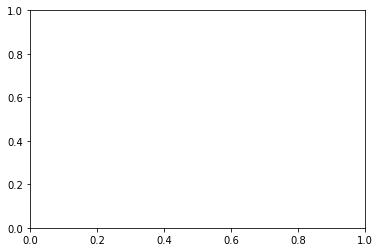

In [4]:
fig, ax = plt.subplots()

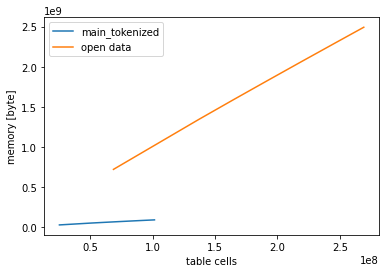

In [5]:
from math import log
import numpy as np
ax.clear()



def plot_mem(data, att, value):
    data = data[data[att] == value]
    x = data['cells']
    y = data['bytes']


    ax.set_ylabel("memory [byte]")
    ax.set_xlabel("table cells")
    return ax.plot(x, y)


data_ns = data[data['algorithm'] ==  'ns']
plot_mem(data_ns, 'table', 'main_tokenized')[0].set_label("main_tokenized")
plot_mem(data_ns, 'table', 'open_data_mate_main_tokenized')[0].set_label("open data")
ax.legend()


fig

the memory footprint is heavily dependant on the dataset at hand.

In [6]:
data[data['algorithm'] == 'dedup_btree']

,cells,bytes,build_duration_nanosec,retr_duration_avg_nanosec,algorithm,table
168,9123,880375,7375047359,226,dedup_btree,main_tokenized
145,108898,12386741,10771180228,492,dedup_btree,main_tokenized
136,186038,22629274,13353594010,605,dedup_btree,main_tokenized
156,231342,29073709,12812319818,722,dedup_btree,main_tokenized
140,295921,38701474,16636508820,908,dedup_btree,main_tokenized
...,...,...,...,...,...,...
179,9641219,4994221991,61424712105,1822,dedup_btree,open_data_mate_main_tokenized
191,9647776,4998210610,62065052631,2780,dedup_btree,open_data_mate_main_tokenized
182,9884177,5157176713,64329121489,1938,dedup_btree,open_data_mate_main_tokenized
181,9913214,5176627957,65888931352,2077,dedup_btree,open_data_mate_main_tokenized


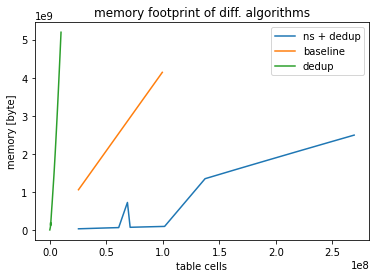

In [7]:
ax.clear()

#data_mt = data[data['table'] == 'main_tokenized']
def memplot(data):
    
    a, = plot_mem(data, 'algorithm', 'ns')
    a.set_label("ns + dedup")
    a, = plot_mem(data, 'algorithm', 'baseline')
    a.set_label("baseline")
    a, = plot_mem(data, 'algorithm', 'dedup_btree')
    a.set_label("dedup")
    
    ax.set_title("memory footprint of diff. algorithms")
    
    ax.legend()
memplot(data)
fig

In [8]:
data[data['algorithm'] == 'dedup_btree']

,cells,bytes,build_duration_nanosec,retr_duration_avg_nanosec,algorithm,table
168,9123,880375,7375047359,226,dedup_btree,main_tokenized
145,108898,12386741,10771180228,492,dedup_btree,main_tokenized
136,186038,22629274,13353594010,605,dedup_btree,main_tokenized
156,231342,29073709,12812319818,722,dedup_btree,main_tokenized
140,295921,38701474,16636508820,908,dedup_btree,main_tokenized
...,...,...,...,...,...,...
179,9641219,4994221991,61424712105,1822,dedup_btree,open_data_mate_main_tokenized
191,9647776,4998210610,62065052631,2780,dedup_btree,open_data_mate_main_tokenized
182,9884177,5157176713,64329121489,1938,dedup_btree,open_data_mate_main_tokenized
181,9913214,5176627957,65888931352,2077,dedup_btree,open_data_mate_main_tokenized


In [9]:
data[data['algorithm'] == 'baseline']

,cells,bytes,build_duration_nanosec,retr_duration_avg_nanosec,algorithm,table
71,25380477,1056217579,11217057079,49,baseline,main_tokenized
35,25380477,1056217579,11217057079,49,baseline,main_tokenized
70,50765891,2112606144,14272857455,55,baseline,main_tokenized
34,50765891,2112606144,14272857455,55,baseline,main_tokenized
33,60912463,2534841654,15036811580,58,baseline,main_tokenized
69,60912463,2534841654,15036811580,58,baseline,main_tokenized
68,71069903,2957519601,14896401738,45,baseline,main_tokenized
32,71069903,2957519601,14896401738,45,baseline,main_tokenized
67,81222630,3380065053,16036352935,45,baseline,main_tokenized
31,81222630,3380065053,16036352935,45,baseline,main_tokenized


In [10]:
tables = ["main_tokenized", "open_data_mate_main_tokenized"]
algos = ["baseline", "ns", "dedup_hash", "dedup_btree"]

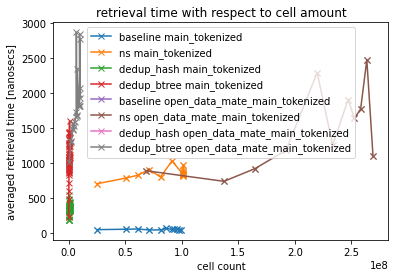

In [11]:
ax.clear()
for table in tables:
    for algorithm in algos:
        d = data
        d = d[d["table"] == table]
        d = d[d["algorithm"] == algorithm]
        cellcount = d['cells']
        retr_time = d['retr_duration_avg_nanosec']
        ax.plot(cellcount, retr_time, marker="x", label=f"{algorithm} {table}")

ax.set_ylabel("averaged retrieval time [nanosecs]")
ax.set_xlabel("cell count")
ax.set_title("retrieval time with respect to cell amount")
ax.legend()
fig